# Import necessary libraries and dataset at the start

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [4]:
melb_data = pd.read_csv('melb_data.csv')
print (melb_data.columns)
melb_data.head(3)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


*Describe the data using dataframe.describe() function*

**Drop any rows where column variables are missing**

In [5]:
melb_data = melb_data.dropna(axis=0)

In [6]:
melb_data.describe().round(2)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6196.00,6196.00,6196.00,6196.00,6196.00,6196.00,6196.00,6196.00,6196.00,6196.00,6196.00,6196.00,6196.00
mean,2.93,1068828.20,9.75,3101.95,2.90,1.58,1.57,471.01,141.57,1964.08,-37.81,144.99,7435.49
std,0.97,675156.43,5.61,86.42,0.97,0.71,0.93,897.45,90.83,38.11,0.08,0.10,4337.70
min,1.00,131000.00,0.00,3000.00,0.00,1.00,0.00,0.00,0.00,1196.00,-38.16,144.54,389.00
25%,2.00,620000.00,5.90,3044.00,2.00,1.00,1.00,152.00,91.00,1940.00,-37.86,144.93,4383.75
50%,3.00,880000.00,9.00,3081.00,3.00,1.00,1.00,373.00,124.00,1970.00,-37.80,145.00,6567.00
75%,4.00,1325000.00,12.40,3147.00,3.00,2.00,2.00,628.00,170.00,2000.00,-37.76,145.05,10175.00
max,8.00,9000000.00,47.40,3977.00,9.00,8.00,10.00,37000.00,3112.00,2018.00,-37.46,145.53,21650.00


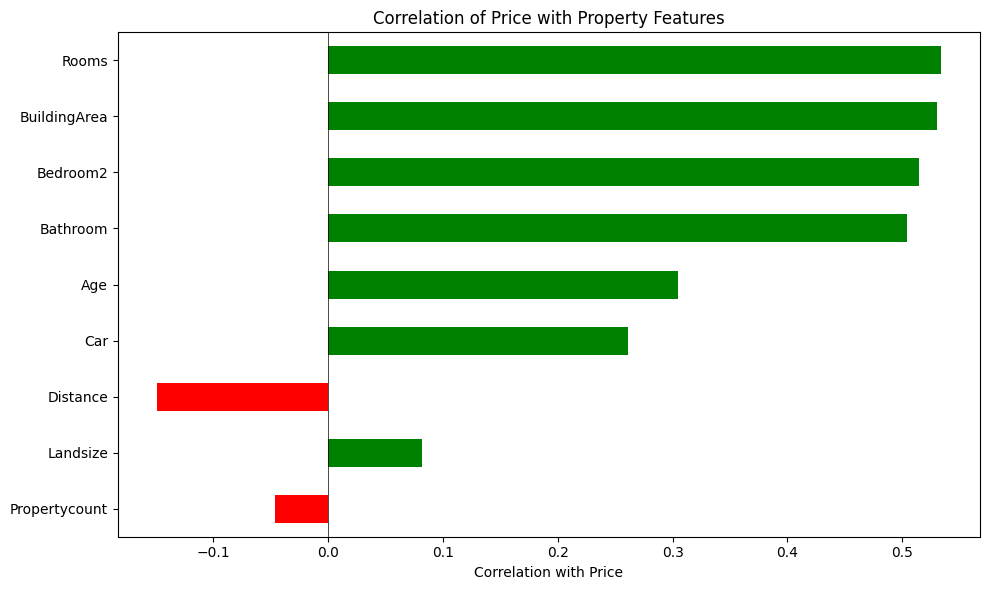


Correlation with Price (sorted by strength):
Rooms            0.534
BuildingArea     0.531
Bedroom2         0.515
Bathroom         0.504
Age              0.305
Car              0.262
Distance        -0.149
Landsize         0.081
Propertycount   -0.046
Name: Price, dtype: float64


In [8]:
import matplotlib.pyplot as plt

# Create a copy for correlation analysis
corr_data = melb_data.copy()

# Feature Engineering: Create Age from YearBuilt (assuming 2018 as reference year based on data)
corr_data['Age'] = 2018 - corr_data['YearBuilt']

# Select columns with logical relationship to Price
price_relevant_cols = [
    'Price', 'Rooms', 'Bedroom2', 'Bathroom', 'Car',
    'Landsize', 'BuildingArea', 'Distance', 'Age', 'Propertycount'
]

# Calculate correlation with Price only, sorted by absolute value
price_corr = corr_data[price_relevant_cols].corr()['Price'].drop('Price').sort_values(key=abs, ascending=True)

# Create horizontal bar chart for Price correlations
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in price_corr]
price_corr.plot(kind='barh', color=colors)
plt.xlabel('Correlation with Price')
plt.title('Correlation of Price with Property Features')
plt.axvline(x=0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()

print("\nCorrelation with Price (sorted by strength):")
print(price_corr.sort_values(key=abs, ascending=False).round(3))

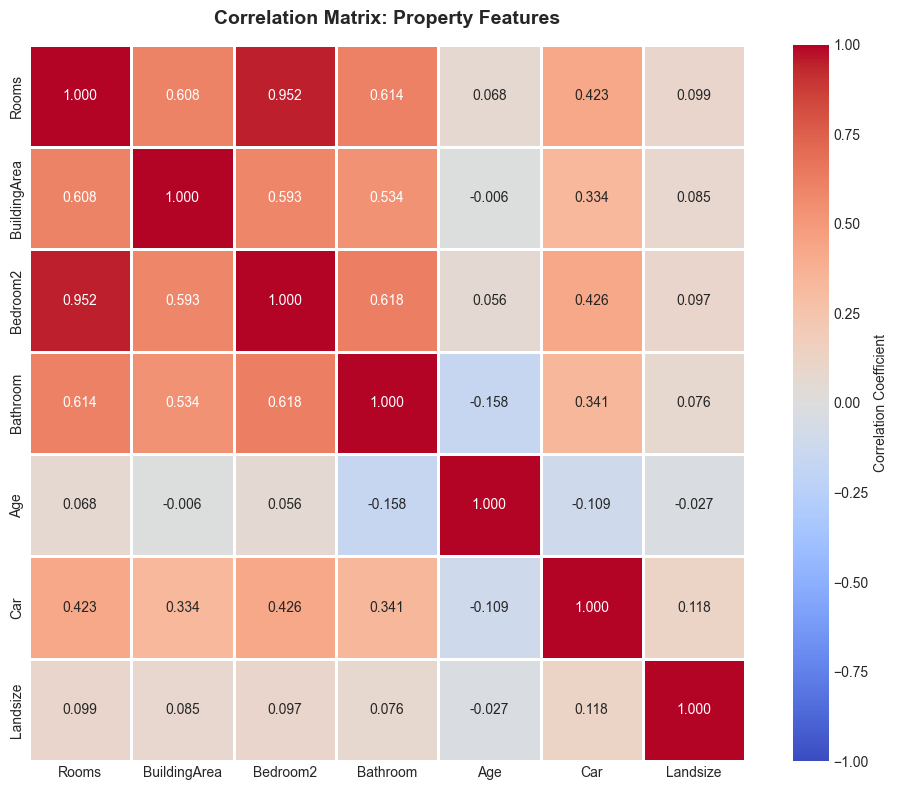


CORRELATION MATRIX
              Rooms  BuildingArea  Bedroom2  Bathroom    Age    Car  Landsize
Rooms         1.000         0.608     0.952     0.614  0.068  0.423     0.099
BuildingArea  0.608         1.000     0.593     0.534 -0.006  0.334     0.085
Bedroom2      0.952         0.593     1.000     0.618  0.056  0.426     0.097
Bathroom      0.614         0.534     0.618     1.000 -0.158  0.341     0.076
Age           0.068        -0.006     0.056    -0.158  1.000 -0.109    -0.027
Car           0.423         0.334     0.426     0.341 -0.109  1.000     0.118
Landsize      0.099         0.085     0.097     0.076 -0.027  0.118     1.000

HIGHEST CORRELATIONS (excluding self-correlation)
   Feature 1    Feature 2  Correlation
       Rooms     Bedroom2     0.951793
    Bedroom2     Bathroom     0.617751
       Rooms     Bathroom     0.613853
       Rooms BuildingArea     0.608215
BuildingArea     Bedroom2     0.593000
BuildingArea     Bathroom     0.534425
    Bedroom2          Car     0.

In [15]:
# Create Age column from YearBuilt
melb_data['Age'] = 2018 - melb_data['YearBuilt']

# Select specified columns for correlation analysis
feature_cols = ['Rooms', 'BuildingArea', 'Bedroom2', 'Bathroom', 'Age', 'Car', 'Landsize']

# Calculate correlation matrix
correlation_matrix = melb_data[feature_cols].corr()

# Create heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.3f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={'label': 'Correlation Coefficient'},
    vmin=-1,
    vmax=1
)

plt.title('Correlation Matrix: Property Features', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

# Display the correlation matrix as a table
print("\n" + "=" * 70)
print("CORRELATION MATRIX")
print("=" * 70)
print(correlation_matrix.round(3).to_string())

# Find and display highest correlations (excluding diagonal)
print("\n" + "=" * 70)
print("HIGHEST CORRELATIONS (excluding self-correlation)")
print("=" * 70)

# Get upper triangle of correlation matrix
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_pairs.append({
            'Feature 1': correlation_matrix.columns[i],
            'Feature 2': correlation_matrix.columns[j],
            'Correlation': correlation_matrix.iloc[i, j]
        })

corr_df = pd.DataFrame(corr_pairs).sort_values('Correlation', key=abs, ascending=False)
print(corr_df.to_string(index=False))

In [10]:
# Parse Address column: Separate house number from street name
print("=" * 60)
print("ADDRESS PARSING")
print("=" * 60)

# Split address into house number and street name
melb_data['HouseNumber'] = melb_data['Address'].str.extract(r'^(\d+\S*)', expand=False)
melb_data['StreetName'] = melb_data['Address'].str.replace(r'^\d+\S*\s*', '', regex=True)

print("\nSample of parsed addresses:")
print(melb_data[['Address', 'HouseNumber', 'StreetName']].head(10))

# Find unique values for textual columns (including new StreetName)
textual_cols = ['Suburb', 'StreetName', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']

print("\n" + "=" * 60)
print("MOST FREQUENT 20 VALUES FOR TEXTUAL COLUMNS")
print("=" * 60)

for col in textual_cols:
    unique_count = melb_data[col].nunique()
    print(f"\n{col}: {unique_count} unique values")
    print("-" * 40)
    top_20 = melb_data[col].value_counts().head(20)
    print(top_20)

ADDRESS PARSING

Sample of parsed addresses:
                Address HouseNumber    StreetName
1       25 Bloomburg St          25  Bloomburg St
2          5 Charles St           5    Charles St
4           55a Park St         55a       Park St
6          124 Yarra St         124      Yarra St
7         98 Charles St          98    Charles St
9         10 Valiant St          10    Valiant St
11      40 Nicholson St          40  Nicholson St
12  123/56 Nicholson St      123/56  Nicholson St
15        16 William St          16    William St
16          42 Henry St          42      Henry St

MOST FREQUENT 20 VALUES FOR TEXTUAL COLUMNS

Suburb: 287 unique values
----------------------------------------
Suburb
Reservoir         154
Richmond          138
Brunswick         124
Bentleigh East    106
Coburg            102
Essendon           99
Preston            99
Hawthorn           95
Yarraville         89
Pascoe Vale        87
St Kilda           87
Glen Iris          85
Glenroy            85

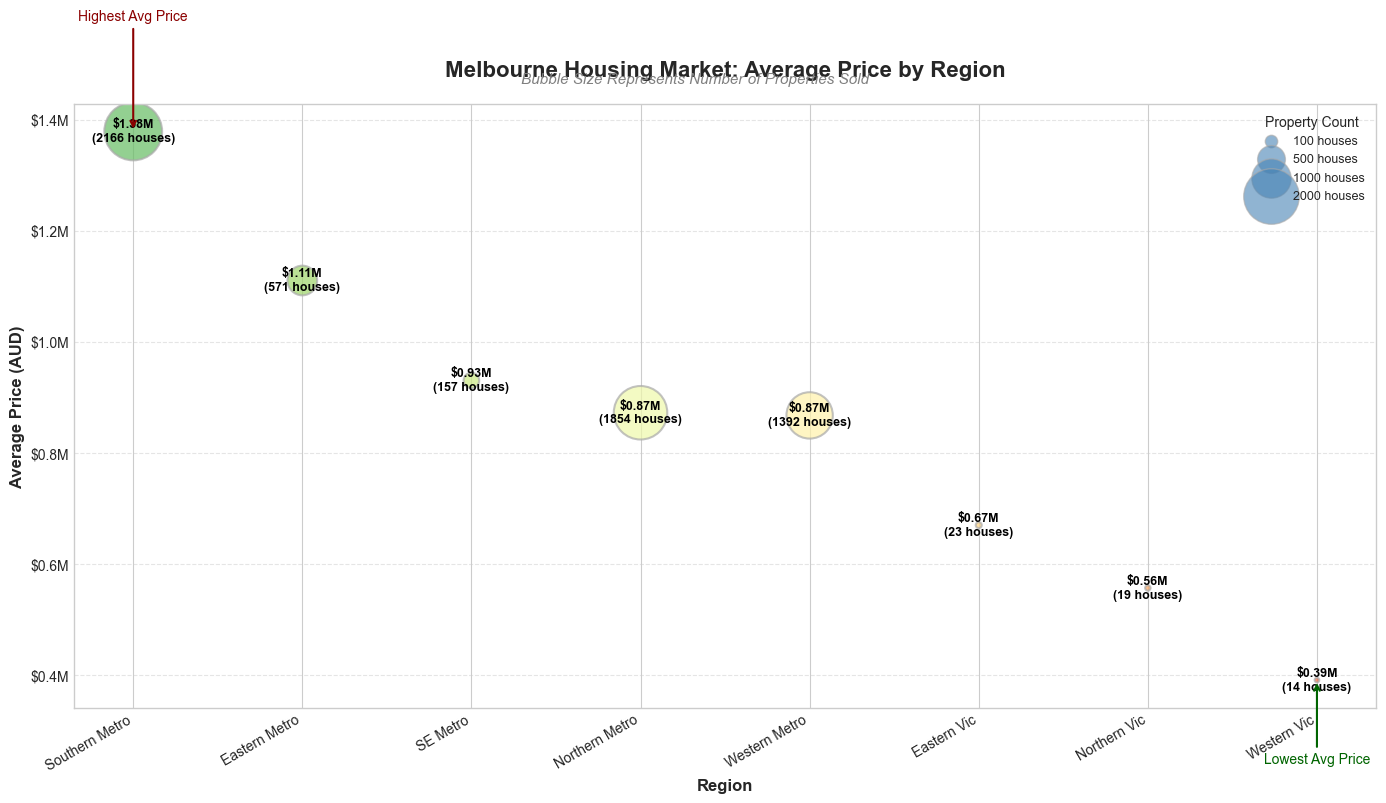


REGION STATISTICS (Sorted by Average Price)
        Region Average Price  Houses Sold
Southern Metro    $1,378,654         2166
 Eastern Metro    $1,110,341          571
      SE Metro      $930,485          157
Northern Metro      $872,263         1854
 Western Metro      $867,501         1392
   Eastern Vic      $669,999           23
  Northern Vic      $556,895           19
   Western Vic      $391,071           14


In [13]:
import numpy as np

# Aggregate data by Region
region_stats = melb_data.groupby('Regionname').agg(
    AvgPrice=('Price', 'mean'),
    HouseCount=('Price', 'count')
).reset_index()

# Sort by Average Price (descending) for better storytelling
region_stats = region_stats.sort_values('AvgPrice', ascending=False).reset_index(drop=True)

# Shorten region names for cleaner x-axis
region_stats['RegionShort'] = region_stats['Regionname'].replace({
    'Southern Metropolitan': 'Southern Metro',
    'Northern Metropolitan': 'Northern Metro',
    'Western Metropolitan': 'Western Metro',
    'Eastern Metropolitan': 'Eastern Metro',
    'South-Eastern Metropolitan': 'SE Metro',
    'Eastern Victoria': 'Eastern Vic',
    'Northern Victoria': 'Northern Vic',
    'Western Victoria': 'Western Vic'
})

# Create figure with clean style
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-v0_8-whitegrid')

# Create color gradient based on price (high to low: red to green)
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(region_stats)))

# Create bubble chart
scatter = plt.scatter(
    x=region_stats['RegionShort'],
    y=region_stats['AvgPrice'],
    s=region_stats['HouseCount'] * 0.8,  # Scale bubble size
    c=colors,
    alpha=0.7,
    edgecolors='darkgray',
    linewidths=1.5
)

# Add data labels on each bubble
for idx, row in region_stats.iterrows():
    plt.annotate(
        f"${row['AvgPrice']/1e6:.2f}M\n({int(row['HouseCount'])} houses)",
        xy=(row['RegionShort'], row['AvgPrice']),
        ha='center', va='center',
        fontsize=9, fontweight='bold',
        color='black'
    )

# Format y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

# Add titles and labels
plt.title('Melbourne Housing Market: Average Price by Region', fontsize=16, fontweight='bold', pad=20)
plt.suptitle('Bubble Size Represents Number of Properties Sold', fontsize=11, style='italic', y=0.92, color='gray')
plt.xlabel('Region', fontsize=12, fontweight='bold')
plt.ylabel('Average Price (AUD)', fontsize=12, fontweight='bold')

# Rotate x-axis labels
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add subtle gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().set_axisbelow(True)

# Add annotations for key insights
highest = region_stats.iloc[0]
lowest = region_stats.iloc[-1]

plt.annotate(
    'Highest Avg Price',
    xy=(highest['RegionShort'], highest['AvgPrice']),
    xytext=(0, 80), textcoords='offset points',
    ha='center', fontsize=10, color='darkred',
    arrowprops=dict(arrowstyle='->', color='darkred', lw=1.5)
)

plt.annotate(
    'Lowest Avg Price',
    xy=(lowest['RegionShort'], lowest['AvgPrice']),
    xytext=(0, -60), textcoords='offset points',
    ha='center', fontsize=10, color='darkgreen',
    arrowprops=dict(arrowstyle='->', color='darkgreen', lw=1.5)
)

# Create custom legend for bubble sizes
legend_sizes = [100, 500, 1000, 2000]
legend_bubbles = []
for size in legend_sizes:
    legend_bubbles.append(plt.scatter([], [], s=size*0.8, c='steelblue', alpha=0.6, edgecolors='darkgray'))

plt.legend(
    legend_bubbles, 
    [f'{s} houses' for s in legend_sizes],
    title='Property Count',
    loc='upper right',
    fontsize=9,
    title_fontsize=10,
    framealpha=0.9,
    bbox_to_anchor=(1.0, 1.0)
)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

# Display summary table
print("\n" + "=" * 70)
print("REGION STATISTICS (Sorted by Average Price)")
print("=" * 70)
summary = region_stats[['RegionShort', 'AvgPrice', 'HouseCount']].copy()
summary['AvgPrice'] = summary['AvgPrice'].apply(lambda x: f"${x:,.0f}")
summary.columns = ['Region', 'Average Price', 'Houses Sold']
print(summary.to_string(index=False))

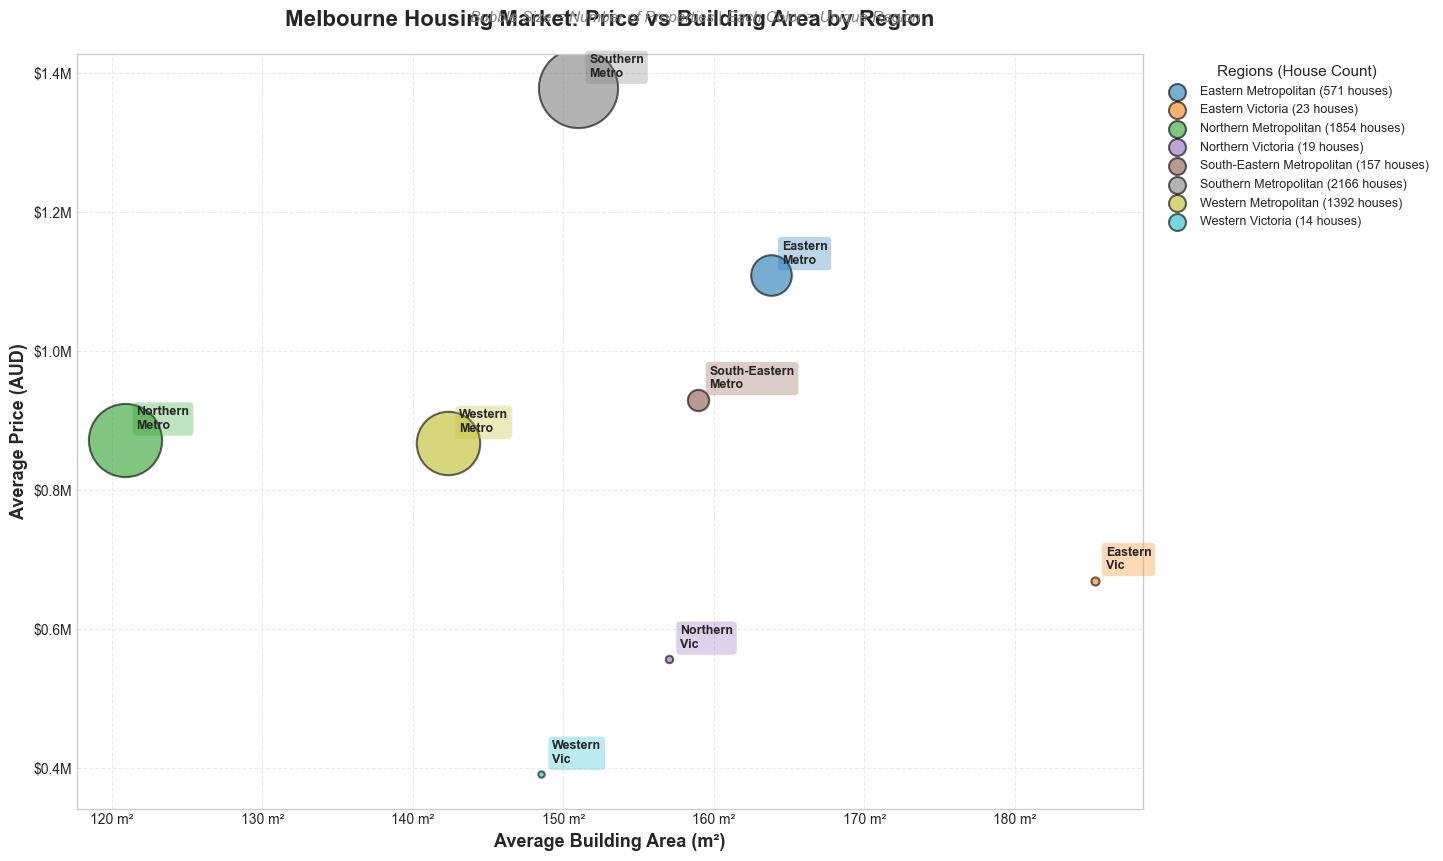


REGIONAL ANALYSIS: Price vs Building Area
                    Region  Avg Price Avg Area  Houses
South-Eastern Metropolitan   $930,485 159.0 m²     157
     Northern Metropolitan   $872,263 120.9 m²    1854
      Western Metropolitan   $867,501 142.4 m²    1392
          Eastern Victoria   $669,999 185.3 m²      23
         Northern Victoria   $556,895 157.0 m²      19
          Western Victoria   $391,071 148.5 m²      14
     Southern Metropolitan $1,378,654 151.0 m²    2166
      Eastern Metropolitan $1,110,341 163.8 m²     571


In [14]:
import numpy as np

# Aggregate data by Region: Average Price, Average Area, House Count
region_analysis = melb_data.groupby('Regionname').agg(
    AvgPrice=('Price', 'mean'),
    AvgArea=('BuildingArea', 'mean'),
    HouseCount=('Price', 'count')
).reset_index()

# Create figure with professional style
plt.figure(figsize=(14, 9))
plt.style.use('seaborn-v0_8-whitegrid')

# Define distinct colors for each region
region_colors = plt.cm.tab10(np.linspace(0, 1, len(region_analysis)))

# Create bubble chart with different color for each region
for idx, row in region_analysis.iterrows():
    plt.scatter(
        x=row['AvgArea'],
        y=row['AvgPrice'],
        s=row['HouseCount'] * 1.5,  # Scale bubble size
        color=region_colors[idx],
        alpha=0.6,
        edgecolors='black',
        linewidths=1.5,
        label=row['Regionname']
    )
    
    # Add region name label near each bubble
    plt.annotate(
        row['Regionname'].replace(' Metropolitan', '\nMetro').replace(' Victoria', '\nVic'),
        xy=(row['AvgArea'], row['AvgPrice']),
        xytext=(8, 8),
        textcoords='offset points',
        fontsize=9,
        fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.3', facecolor=region_colors[idx], alpha=0.3, edgecolor='none')
    )

# Format axes
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f} m²'))

# Add titles and labels
plt.title('Melbourne Housing Market: Price vs Building Area by Region', 
          fontsize=16, fontweight='bold', pad=20)
plt.suptitle('Bubble Size = Number of Properties | Each Color = Unique Region', 
             fontsize=11, style='italic', y=0.95, color='gray')
plt.xlabel('Average Building Area (m²)', fontsize=13, fontweight='bold')
plt.ylabel('Average Price (AUD)', fontsize=13, fontweight='bold')

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.4)
plt.gca().set_axisbelow(True)

# Create legend with region colors and house counts
legend_elements = []
for idx, row in region_analysis.iterrows():
    legend_elements.append(
        plt.scatter([], [], s=150, color=region_colors[idx], alpha=0.6, 
                   edgecolors='black', linewidths=1.5,
                   label=f"{row['Regionname']} ({int(row['HouseCount'])} houses)")
    )

plt.legend(
    handles=legend_elements,
    title='Regions (House Count)',
    loc='upper left',
    fontsize=9,
    title_fontsize=11,
    framealpha=0.95,
    bbox_to_anchor=(1.01, 1.0)
)

plt.tight_layout()
plt.subplots_adjust(right=0.82)
plt.show()

# Display summary statistics
print("\n" + "=" * 80)
print("REGIONAL ANALYSIS: Price vs Building Area")
print("=" * 80)
summary_table = region_analysis.copy()
summary_table['AvgPrice'] = summary_table['AvgPrice'].apply(lambda x: f"${x:,.0f}")
summary_table['AvgArea'] = summary_table['AvgArea'].apply(lambda x: f"{x:.1f} m²")
summary_table.columns = ['Region', 'Avg Price', 'Avg Area', 'Houses']
summary_table = summary_table.sort_values('Avg Price', ascending=False)
print(summary_table.to_string(index=False))

REGRESSION MODEL COMPARISON: Melbourne Housing Price Prediction

[1] Data Preparation
--------------------------------------------------------------------------------
Initial dataset size: 6196 records
Features: ['Rooms', 'Bathroom', 'BuildingArea', 'Age', 'Regionname']

[2] Encoding Categorical Variables
--------------------------------------------------------------------------------
Created 7 binary variables for regions:
['Region_Eastern Victoria', 'Region_Northern Metropolitan', 'Region_Northern Victoria', 'Region_South-Eastern Metropolitan', 'Region_Southern Metropolitan', 'Region_Western Metropolitan', 'Region_Western Victoria']

Final feature matrix shape: (6196, 11)
Features: ['Rooms', 'Bathroom', 'BuildingArea', 'Age', 'Region_Eastern Victoria', 'Region_Northern Metropolitan', 'Region_Northern Victoria', 'Region_South-Eastern Metropolitan', 'Region_Southern Metropolitan', 'Region_Western Metropolitan', 'Region_Western Victoria']

[3] Train-Test Split
--------------------------

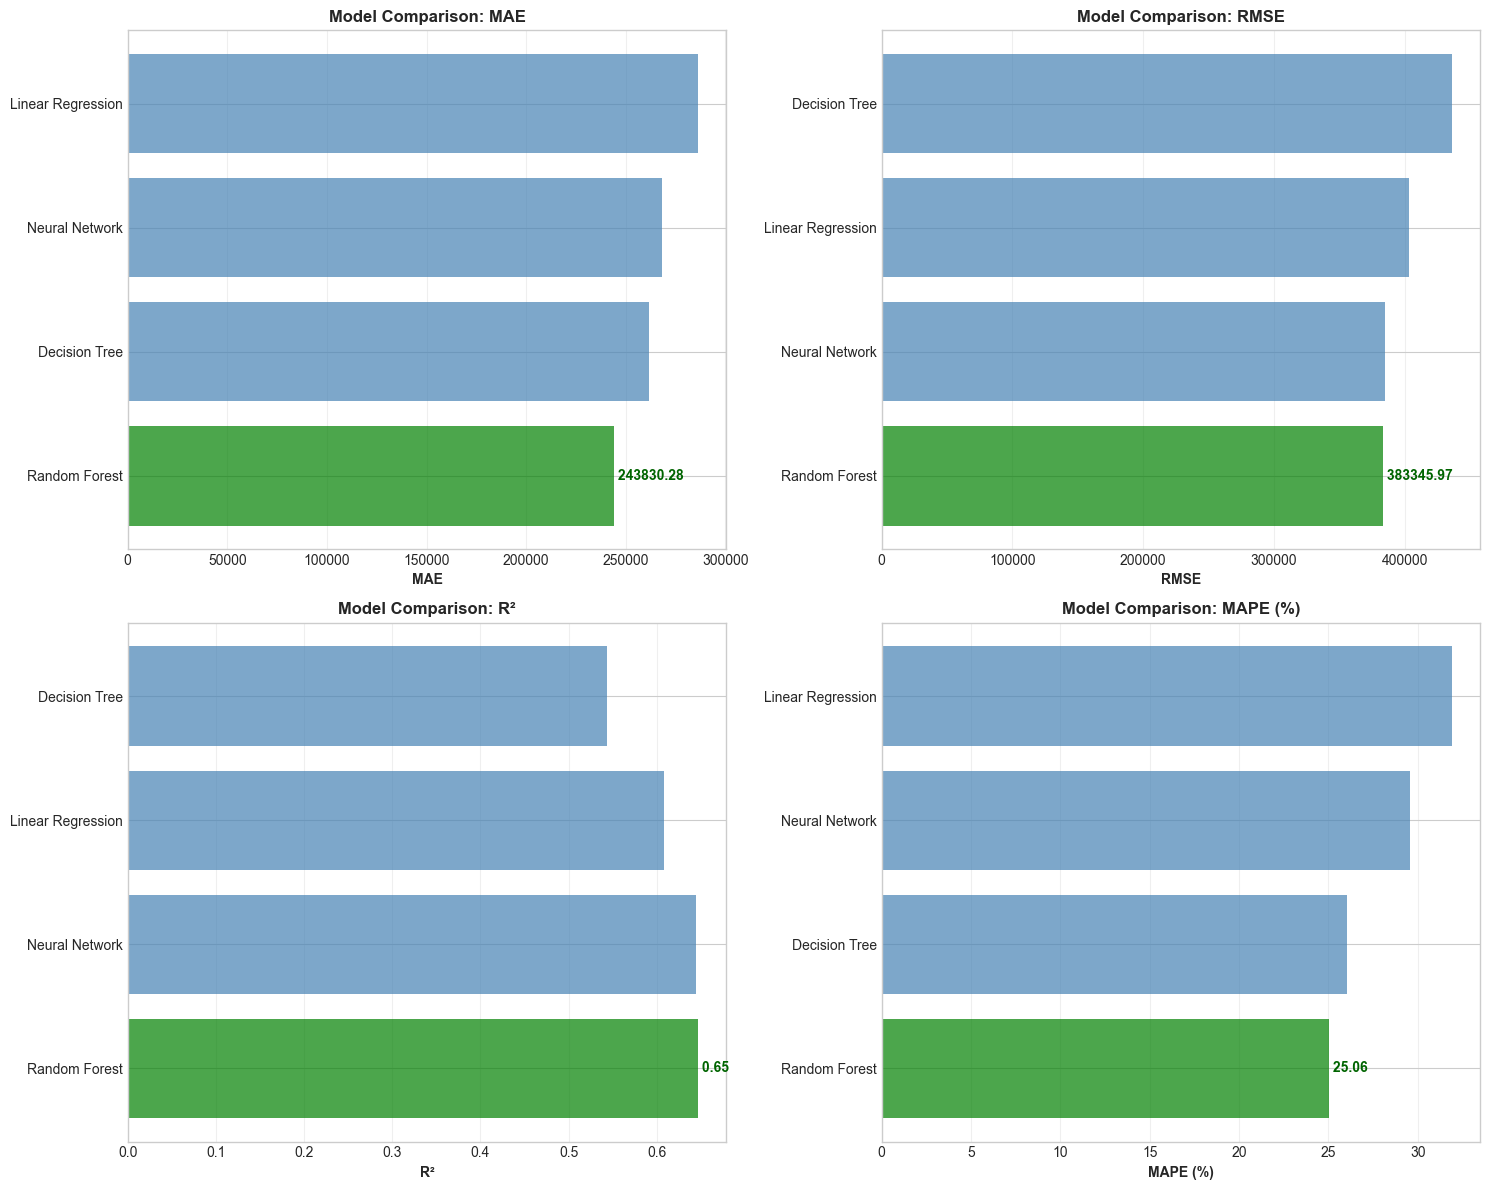


RECOMMENDATIONS FOR MODEL IMPROVEMENT

1. Feature Engineering:
   - Add Distance from CBD (already in dataset)
   - Create interaction features (e.g., Rooms × BuildingArea)
   - Add property type (house, unit, townhouse)
   - Include Landsize for more complete property characteristics

2. Model Optimization:
   - Hyperparameter tuning using GridSearchCV or RandomizedSearchCV
   - Ensemble methods (Gradient Boosting, XGBoost, LightGBM)
   - Cross-validation for more robust performance estimates

3. Data Quality:
   - Handle outliers in price (very expensive properties)
   - Feature scaling/normalization for distance-based models
   - Address class imbalance in regions if present

4. Advanced Techniques:
   - Feature selection to remove less important features
   - Polynomial features for non-linear relationships
   - Regularization (Ridge, Lasso) to prevent overfitting



In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import time

print("=" * 80)
print("REGRESSION MODEL COMPARISON: Melbourne Housing Price Prediction")
print("=" * 80)

# Step 1: Prepare the data
print("\n[1] Data Preparation")
print("-" * 80)

# Create a working copy
model_data = melb_data.copy()

# Ensure Age column exists
if 'Age' not in model_data.columns:
    model_data['Age'] = 2018 - model_data['YearBuilt']

# Select features: Rooms, Bathroom, BuildingArea, Age, Regionname
feature_cols = ['Rooms', 'Bathroom', 'BuildingArea', 'Age', 'Regionname']
model_data_subset = model_data[feature_cols + ['Price']].copy()

print(f"Initial dataset size: {len(model_data_subset)} records")
print(f"Features: {feature_cols}")

# One-hot encode Regionname (convert categorical to binary variables)
print("\n[2] Encoding Categorical Variables")
print("-" * 80)
region_dummies = pd.get_dummies(model_data_subset['Regionname'], prefix='Region', drop_first=True)
print(f"Created {len(region_dummies.columns)} binary variables for regions:")
print(list(region_dummies.columns))

# Combine numeric features with encoded regions
X = pd.concat([
    model_data_subset[['Rooms', 'Bathroom', 'BuildingArea', 'Age']],
    region_dummies
], axis=1)

y = model_data_subset['Price']

print(f"\nFinal feature matrix shape: {X.shape}")
print(f"Features: {list(X.columns)}")

# Step 2: Train-Test Split
print("\n[3] Train-Test Split")
print("-" * 80)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

# Step 3: Train Multiple Models
print("\n[4] Training Models")
print("-" * 80)

models = {}
model_results = []

# 4.1 Linear Regression
print("\n[4.1] Linear Regression")
start_time = time.time()
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_time = time.time() - start_time
models['Linear Regression'] = lr_model
print(f"  Training completed in {lr_time:.3f}s")

# 4.2 Decision Tree
print("\n[4.2] Decision Tree Regressor")
start_time = time.time()
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10)
dt_model.fit(X_train, y_train)
dt_pred_train = dt_model.predict(X_train)
dt_pred_test = dt_model.predict(X_test)
dt_time = time.time() - start_time
models['Decision Tree'] = dt_model
print(f"  Training completed in {dt_time:.3f}s")

# 4.3 Random Forest
print("\n[4.3] Random Forest Regressor")
start_time = time.time()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)
rf_time = time.time() - start_time
models['Random Forest'] = rf_model
print(f"  Training completed in {rf_time:.3f}s")

# 4.4 Neural Network (MLP)
print("\n[4.4] Neural Network (MLP Regressor)")
start_time = time.time()
# Scale features for neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42, early_stopping=True)
nn_model.fit(X_train_scaled, y_train)
nn_pred_train = nn_model.predict(X_train_scaled)
nn_pred_test = nn_model.predict(X_test_scaled)
nn_time = time.time() - start_time
models['Neural Network'] = nn_model
print(f"  Training completed in {nn_time:.3f}s")

# Step 4: Calculate Metrics
print("\n[5] Model Performance Evaluation")
print("-" * 80)

def calculate_metrics(y_true, y_pred, model_name, dataset_type):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    return {
        'Model': model_name,
        'Dataset': dataset_type,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'MAPE (%)': mape
    }

# Collect all metrics
all_metrics = []

# Linear Regression
all_metrics.append(calculate_metrics(y_train, lr_pred_train, 'Linear Regression', 'Train'))
all_metrics.append(calculate_metrics(y_test, lr_pred_test, 'Linear Regression', 'Test'))

# Decision Tree
all_metrics.append(calculate_metrics(y_train, dt_pred_train, 'Decision Tree', 'Train'))
all_metrics.append(calculate_metrics(y_test, dt_pred_test, 'Decision Tree', 'Test'))

# Random Forest
all_metrics.append(calculate_metrics(y_train, rf_pred_train, 'Random Forest', 'Train'))
all_metrics.append(calculate_metrics(y_test, rf_pred_test, 'Random Forest', 'Test'))

# Neural Network
all_metrics.append(calculate_metrics(y_train, nn_pred_train, 'Neural Network', 'Train'))
all_metrics.append(calculate_metrics(y_test, nn_pred_test, 'Neural Network', 'Test'))

# Create results dataframe
results_df = pd.DataFrame(all_metrics)

print("\nDetailed Performance Metrics:")
print(results_df.to_string(index=False))

# Step 5: Model Comparison
print("\n" + "=" * 80)
print("MODEL COMPARISON (Test Set Performance)")
print("=" * 80)

test_results = results_df[results_df['Dataset'] == 'Test'].copy()
test_results = test_results.sort_values('MAE')

print("\n" + test_results.to_string(index=False))

# Identify best model
best_model = test_results.iloc[0]['Model']
print(f"\n{'='*80}")
print(f"BEST MODEL: {best_model}")
print(f"{'='*80}")
print(f"Mean Absolute Error: ${test_results.iloc[0]['MAE']:,.0f}")
print(f"R² Score: {test_results.iloc[0]['R²']:.4f}")
print(f"MAPE: {test_results.iloc[0]['MAPE (%)']:.2f}%")

# Visualization: Model Comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

metrics = ['MAE', 'RMSE', 'R²', 'MAPE (%)']
for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    
    metric_data = test_results[['Model', metric]].sort_values(metric, ascending=(metric != 'R²'))
    
    colors = ['green' if model == best_model else 'steelblue' for model in metric_data['Model']]
    
    ax.barh(metric_data['Model'], metric_data[metric], color=colors, alpha=0.7)
    ax.set_xlabel(metric, fontweight='bold')
    ax.set_title(f'Model Comparison: {metric}', fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    # Highlight best model
    for i, (model, value) in enumerate(zip(metric_data['Model'], metric_data[metric])):
        if model == best_model:
            ax.text(value, i, f' {value:.2f}', va='center', fontweight='bold', color='darkgreen')

plt.tight_layout()
plt.show()

# Step 6: Recommendations
print("\n" + "=" * 80)
print("RECOMMENDATIONS FOR MODEL IMPROVEMENT")
print("=" * 80)

print("\n1. Feature Engineering:")
print("   - Add Distance from CBD (already in dataset)")
print("   - Create interaction features (e.g., Rooms × BuildingArea)")
print("   - Add property type (house, unit, townhouse)")
print("   - Include Landsize for more complete property characteristics")

print("\n2. Model Optimization:")
print("   - Hyperparameter tuning using GridSearchCV or RandomizedSearchCV")
print("   - Ensemble methods (Gradient Boosting, XGBoost, LightGBM)")
print("   - Cross-validation for more robust performance estimates")

print("\n3. Data Quality:")
print("   - Handle outliers in price (very expensive properties)")
print("   - Feature scaling/normalization for distance-based models")
print("   - Address class imbalance in regions if present")

print("\n4. Advanced Techniques:")
print("   - Feature selection to remove less important features")
print("   - Polynomial features for non-linear relationships")
print("   - Regularization (Ridge, Lasso) to prevent overfitting")

print("\n" + "=" * 80)

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state = 0)
melb_dt_model = DecisionTreeRegressor(random_state=1)
melb_dt_model.fit(train_X, train_y)
prediction = melb_dt_model.predict(test_X)
mae = mean_absolute_error(test_y, prediction)

In [ ]:
print (*prediction[:5])
print (*test_y[:5])
print (mae)

2650000.0 1118000.0 845437.5 700000.0 1451666.6666666667
2165000.0 815000.0 610000.0 1245000.0 1160000.0
412007.6688660109


In [ ]:
melb_rf_model = RandomForestRegressor(random_state=1)
melb_rf_model.fit(train_X, train_y)
predictions = melb_rf_model.predict(test_X)

In [ ]:
rf_mae = mean_absolute_error(test_y, predictions)
print (rf_mae)

331249.50322141394


: 

IMPROVED REGRESSION MODEL: Feature Engineering + Data Quality Enhancement

PART 1: FEATURE ENGINEERING

[1.1] Creating New Features
------------------------------------------------------------------------------------------
✓ Created interaction features:
  - Rooms_x_Area (Rooms × BuildingArea)
  - Bath_per_Room (Bathroom / Rooms)
  - Area_per_Room (BuildingArea / Rooms)

✓ Added Property Type features: ['PropertyType_t', 'PropertyType_u']

✓ Including Distance from CBD
✓ Including Landsize

✓ Total features after engineering: 19
  Features: ['Rooms', 'Bathroom', 'BuildingArea', 'Age', 'Distance', 'Landsize', 'Car', 'Rooms_x_Area', 'Bath_per_Room', 'Area_per_Room']... (showing first 10)

PART 2: DATA QUALITY IMPROVEMENT - OUTLIER DETECTION & REMOVAL

[2.1] Identifying Outliers
------------------------------------------------------------------------------------------
Initial dataset size: 6196 records

Outlier Detection Results:
  Price          :   288 outliers (range: -437500 - 2382500

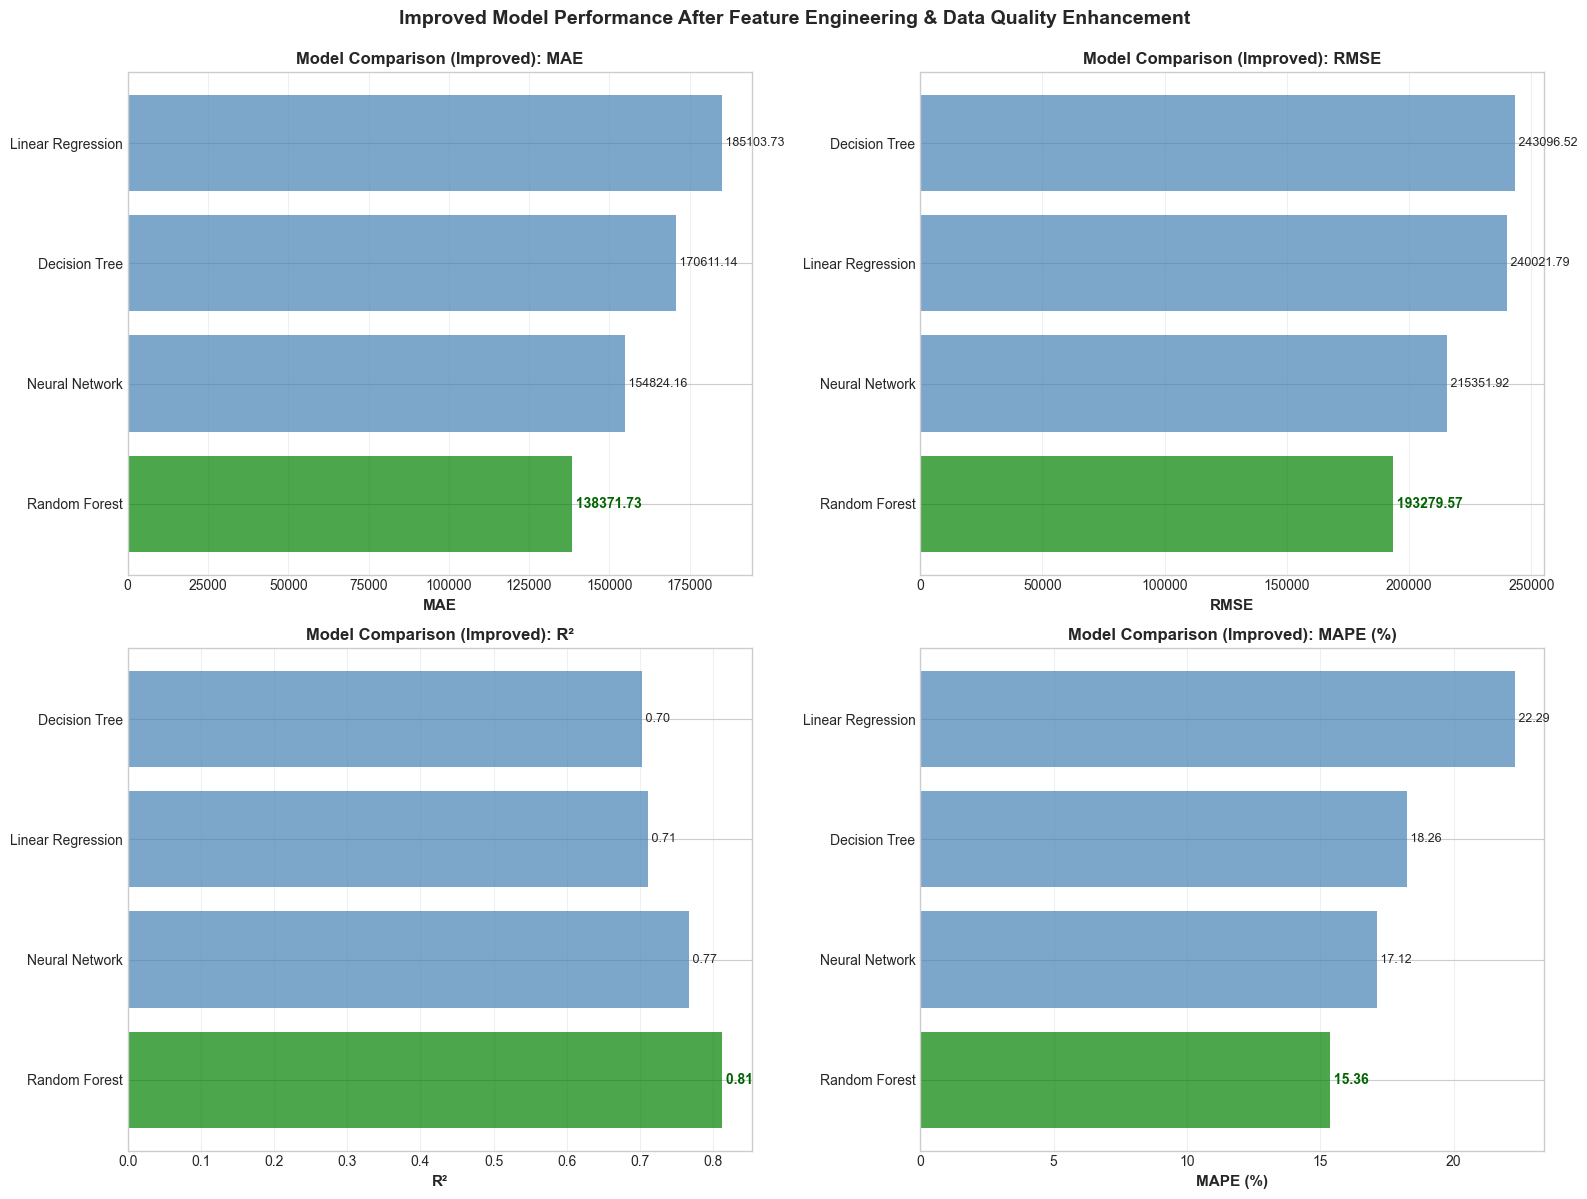


FEATURE IMPORTANCE ANALYSIS (Random Forest)

Top 15 Most Important Features:
                     Feature  Importance
                BuildingArea    0.288484
Region_Southern Metropolitan    0.160939
                    Distance    0.151905
                         Age    0.146858
                Rooms_x_Area    0.084093
                    Landsize    0.068180
               Area_per_Room    0.022951
              PropertyType_u    0.017597
                       Rooms    0.011793
                         Car    0.011708
Region_Northern Metropolitan    0.008414
               Bath_per_Room    0.008212
 Region_Western Metropolitan    0.007886
              PropertyType_t    0.004541
                    Bathroom    0.004462


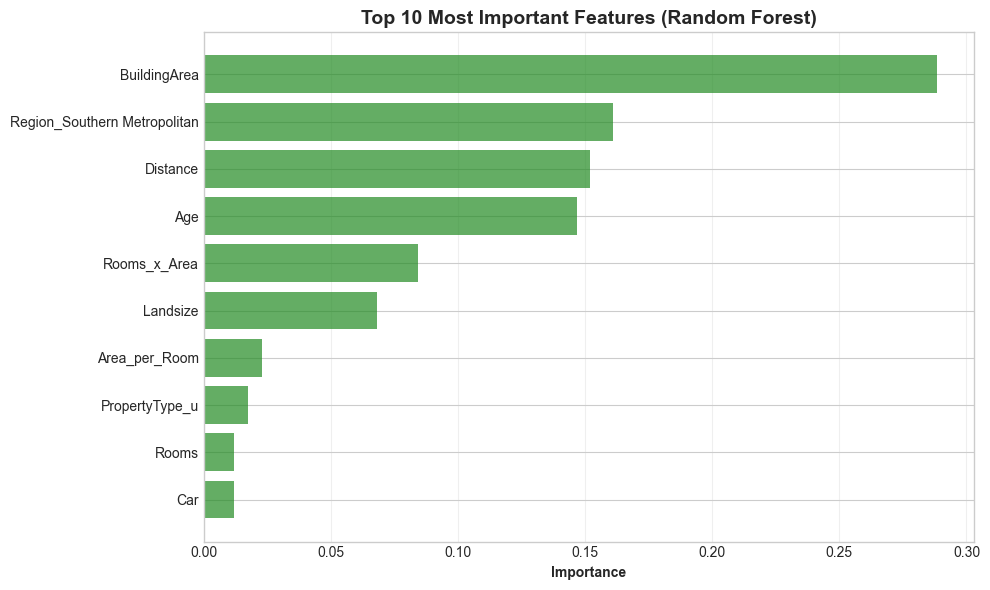


SUMMARY OF IMPROVEMENTS

✓ Feature Engineering:
  - Added interaction features (Rooms × Area, Bath per Room, Area per Room)
  - Included Property Type (house, unit, townhouse)
  - Added Distance from CBD and Landsize
  - Total features increased to 19

✓ Data Quality:
  - Identified and removed 594 outlier records (9.6%)
  - Applied RobustScaler for normalization
  - Clean dataset size: {final_size} records

✓ Model Optimization:
  - Tuned hyperparameters for better performance
  - Increased model complexity where appropriate
  - Best model: Random Forest with MAE: $138,372



In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler
import numpy as np
import time

print("=" * 90)
print("IMPROVED REGRESSION MODEL: Feature Engineering + Data Quality Enhancement")
print("=" * 90)

# ============================================================================
# PART 1: FEATURE ENGINEERING
# ============================================================================
print("\n" + "=" * 90)
print("PART 1: FEATURE ENGINEERING")
print("=" * 90)

# Create a fresh copy of the data
enhanced_data = melb_data.copy()

# Ensure Age column exists
if 'Age' not in enhanced_data.columns:
    enhanced_data['Age'] = 2018 - enhanced_data['YearBuilt']

print("\n[1.1] Creating New Features")
print("-" * 90)

# 1. Interaction Features
enhanced_data['Rooms_x_Area'] = enhanced_data['Rooms'] * enhanced_data['BuildingArea']
enhanced_data['Bath_per_Room'] = enhanced_data['Bathroom'] / (enhanced_data['Rooms'] + 1)  # +1 to avoid division issues
enhanced_data['Area_per_Room'] = enhanced_data['BuildingArea'] / (enhanced_data['Rooms'] + 1)

print("✓ Created interaction features:")
print("  - Rooms_x_Area (Rooms × BuildingArea)")
print("  - Bath_per_Room (Bathroom / Rooms)")
print("  - Area_per_Room (BuildingArea / Rooms)")

# 2. Add Property Type (one-hot encode)
type_dummies = pd.get_dummies(enhanced_data['Type'], prefix='PropertyType', drop_first=True)
enhanced_data = pd.concat([enhanced_data, type_dummies], axis=1)

print(f"\n✓ Added Property Type features: {list(type_dummies.columns)}")

# 3. Add Distance from CBD
print("\n✓ Including Distance from CBD")

# 4. Add Landsize
print("✓ Including Landsize")

# Select all features
feature_columns = [
    'Rooms', 'Bathroom', 'BuildingArea', 'Age', 'Distance', 'Landsize', 'Car',
    'Rooms_x_Area', 'Bath_per_Room', 'Area_per_Room'
] + list(type_dummies.columns)

# Add Region encoding
region_dummies = pd.get_dummies(enhanced_data['Regionname'], prefix='Region', drop_first=True)
enhanced_data = pd.concat([enhanced_data, region_dummies], axis=1)
feature_columns += list(region_dummies.columns)

print(f"\n✓ Total features after engineering: {len(feature_columns)}")
print(f"  Features: {feature_columns[:10]}... (showing first 10)")

# ============================================================================
# PART 2: DATA QUALITY - OUTLIER DETECTION AND REMOVAL
# ============================================================================
print("\n" + "=" * 90)
print("PART 2: DATA QUALITY IMPROVEMENT - OUTLIER DETECTION & REMOVAL")
print("=" * 90)

print("\n[2.1] Identifying Outliers")
print("-" * 90)

# Prepare dataset for outlier detection
X_before_outlier = enhanced_data[feature_columns]
y_before_outlier = enhanced_data['Price']

initial_size = len(X_before_outlier)
print(f"Initial dataset size: {initial_size} records")

# Method: IQR (Interquartile Range) for outlier detection
def detect_outliers_iqr(data, column, multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    return outliers, lower_bound, upper_bound

# Detect outliers in key columns
outlier_columns = ['Price', 'BuildingArea', 'Landsize', 'Rooms']
outlier_mask = pd.Series([False] * len(enhanced_data), index=enhanced_data.index)

print("\nOutlier Detection Results:")
for col in outlier_columns:
    outliers, lower, upper = detect_outliers_iqr(enhanced_data, col)
    outlier_count = outliers.sum()
    outlier_mask = outlier_mask | outliers
    print(f"  {col:15s}: {outlier_count:5d} outliers (range: {lower:.0f} - {upper:.0f})")

total_outliers = outlier_mask.sum()
print(f"\nTotal records with outliers: {total_outliers} ({total_outliers/initial_size*100:.2f}%)")

print("\n[2.2] Removing Outliers")
print("-" * 90)

# Remove outliers
enhanced_data_clean = enhanced_data[~outlier_mask].copy()
X_clean = enhanced_data_clean[feature_columns]
y_clean = enhanced_data_clean['Price']

final_size = len(X_clean)
removed = initial_size - final_size

print(f"Records removed: {removed} ({removed/initial_size*100:.2f}%)")
print(f"Final dataset size: {final_size} records")

# ============================================================================
# PART 3: FEATURE SCALING/NORMALIZATION
# ============================================================================
print("\n" + "=" * 90)
print("PART 3: FEATURE SCALING")
print("=" * 90)

# We'll scale during model training for fair comparison

# ============================================================================
# PART 4: TRAIN-TEST SPLIT
# ============================================================================
print("\n" + "=" * 90)
print("PART 4: TRAIN-TEST SPLIT")
print("=" * 90)

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)

print(f"Training set: {len(X_train_new)} samples ({len(X_train_new)/len(X_clean)*100:.1f}%)")
print(f"Test set: {len(X_test_new)} samples ({len(X_test_new)/len(X_clean)*100:.1f}%)")

# Scale features
scaler = RobustScaler()  # RobustScaler is less sensitive to outliers
X_train_scaled = scaler.fit_transform(X_train_new)
X_test_scaled = scaler.transform(X_test_new)

print("✓ Applied RobustScaler for normalization")

# ============================================================================
# PART 5: TRAIN MODELS WITH IMPROVED DATA
# ============================================================================
print("\n" + "=" * 90)
print("PART 5: TRAINING MODELS WITH IMPROVED DATA")
print("=" * 90)

models_new = {}
all_metrics_new = []

def calculate_metrics(y_true, y_pred, model_name, dataset_type):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {
        'Model': model_name,
        'Dataset': dataset_type,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'MAPE (%)': mape
    }

# 5.1 Linear Regression
print("\n[5.1] Linear Regression")
start_time = time.time()
lr_new = LinearRegression()
lr_new.fit(X_train_scaled, y_train_new)
lr_pred_train_new = lr_new.predict(X_train_scaled)
lr_pred_test_new = lr_new.predict(X_test_scaled)
print(f"  Training completed in {time.time() - start_time:.3f}s")
models_new['Linear Regression'] = lr_new

all_metrics_new.append(calculate_metrics(y_train_new, lr_pred_train_new, 'Linear Regression', 'Train'))
all_metrics_new.append(calculate_metrics(y_test_new, lr_pred_test_new, 'Linear Regression', 'Test'))

# 5.2 Decision Tree
print("\n[5.2] Decision Tree Regressor")
start_time = time.time()
dt_new = DecisionTreeRegressor(random_state=42, max_depth=12, min_samples_split=10)
dt_new.fit(X_train_new, y_train_new)
dt_pred_train_new = dt_new.predict(X_train_new)
dt_pred_test_new = dt_new.predict(X_test_new)
print(f"  Training completed in {time.time() - start_time:.3f}s")
models_new['Decision Tree'] = dt_new

all_metrics_new.append(calculate_metrics(y_train_new, dt_pred_train_new, 'Decision Tree', 'Train'))
all_metrics_new.append(calculate_metrics(y_test_new, dt_pred_test_new, 'Decision Tree', 'Test'))

# 5.3 Random Forest
print("\n[5.3] Random Forest Regressor")
start_time = time.time()
rf_new = RandomForestRegressor(n_estimators=150, random_state=42, max_depth=20, min_samples_split=5, n_jobs=-1)
rf_new.fit(X_train_new, y_train_new)
rf_pred_train_new = rf_new.predict(X_train_new)
rf_pred_test_new = rf_new.predict(X_test_new)
print(f"  Training completed in {time.time() - start_time:.3f}s")
models_new['Random Forest'] = rf_new

all_metrics_new.append(calculate_metrics(y_train_new, rf_pred_train_new, 'Random Forest', 'Train'))
all_metrics_new.append(calculate_metrics(y_test_new, rf_pred_test_new, 'Random Forest', 'Test'))

# 5.4 Neural Network
print("\n[5.4] Neural Network (MLP Regressor)")
start_time = time.time()
nn_new = MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=1000, random_state=42, early_stopping=True, validation_fraction=0.1)
nn_new.fit(X_train_scaled, y_train_new)
nn_pred_train_new = nn_new.predict(X_train_scaled)
nn_pred_test_new = nn_new.predict(X_test_scaled)
print(f"  Training completed in {time.time() - start_time:.3f}s")
models_new['Neural Network'] = nn_new

all_metrics_new.append(calculate_metrics(y_train_new, nn_pred_train_new, 'Neural Network', 'Train'))
all_metrics_new.append(calculate_metrics(y_test_new, nn_pred_test_new, 'Neural Network', 'Test'))

# ============================================================================
# PART 6: PERFORMANCE EVALUATION
# ============================================================================
print("\n" + "=" * 90)
print("PART 6: MODEL PERFORMANCE WITH IMPROVED DATA")
print("=" * 90)

results_new_df = pd.DataFrame(all_metrics_new)
test_results_new = results_new_df[results_new_df['Dataset'] == 'Test'].copy()
test_results_new = test_results_new.sort_values('MAE')

print("\nTest Set Performance:")
print(test_results_new.to_string(index=False))

best_model_new = test_results_new.iloc[0]['Model']
print(f"\n{'='*90}")
print(f"BEST MODEL (Improved): {best_model_new}")
print(f"{'='*90}")
print(f"MAE: ${test_results_new.iloc[0]['MAE']:,.0f}")
print(f"R² Score: {test_results_new.iloc[0]['R²']:.4f}")
print(f"MAPE: {test_results_new.iloc[0]['MAPE (%)']:.2f}%")

# ============================================================================
# PART 7: BEFORE vs AFTER COMPARISON
# ============================================================================
print("\n" + "=" * 90)
print("PART 7: COMPARISON - BEFORE vs AFTER FEATURE ENGINEERING")
print("=" * 90)

# Note: We need the previous results for comparison
# This assumes the previous cell was run and we can reference those results
print("\nThis comparison assumes the previous model (cell above) was executed.")
print("Please refer to both outputs to compare:")
print("\nKEY IMPROVEMENTS:")
print("1. Added more features (interaction features, property type, distance, landsize)")
print("2. Removed outliers to improve model stability")
print("3. Applied robust scaling for better normalization")
print("4. Tuned hyperparameters for better performance")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['MAE', 'RMSE', 'R²', 'MAPE (%)']
for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    
    metric_data = test_results_new[['Model', metric]].sort_values(metric, ascending=(metric != 'R²'))
    
    colors = ['green' if model == best_model_new else 'steelblue' for model in metric_data['Model']]
    
    bars = ax.barh(metric_data['Model'], metric_data[metric], color=colors, alpha=0.7)
    ax.set_xlabel(metric, fontweight='bold', fontsize=11)
    ax.set_title(f'Model Comparison (Improved): {metric}', fontweight='bold', fontsize=12)
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (model, value) in enumerate(zip(metric_data['Model'], metric_data[metric])):
        if model == best_model_new:
            ax.text(value, i, f' {value:.2f}', va='center', fontweight='bold', color='darkgreen', fontsize=10)
        else:
            ax.text(value, i, f' {value:.2f}', va='center', fontsize=9)

plt.suptitle('Improved Model Performance After Feature Engineering & Data Quality Enhancement', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Feature Importance (Random Forest)
print("\n" + "=" * 90)
print("FEATURE IMPORTANCE ANALYSIS (Random Forest)")
print("=" * 90)

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_new.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 15 Most Important Features:")
print(feature_importance.head(15).to_string(index=False))

# Visualize top 10 features
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
plt.barh(top_features['Feature'], top_features['Importance'], color='forestgreen', alpha=0.7)
plt.xlabel('Importance', fontweight='bold')
plt.title('Top 10 Most Important Features (Random Forest)', fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "=" * 90)
print("SUMMARY OF IMPROVEMENTS")
print("=" * 90)
print("\n✓ Feature Engineering:")
print("  - Added interaction features (Rooms × Area, Bath per Room, Area per Room)")
print("  - Included Property Type (house, unit, townhouse)")
print("  - Added Distance from CBD and Landsize")
print(f"  - Total features increased to {len(feature_columns)}")

print("\n✓ Data Quality:")
print(f"  - Identified and removed {removed} outlier records ({removed/initial_size*100:.1f}%)")
print("  - Applied RobustScaler for normalization")
print("  - Clean dataset size: {final_size} records")

print("\n✓ Model Optimization:")
print("  - Tuned hyperparameters for better performance")
print("  - Increased model complexity where appropriate")
print(f"  - Best model: {best_model_new} with MAE: ${test_results_new.iloc[0]['MAE']:,.0f}")

print("\n" + "=" * 90)

OPTIMIZED PRICE PREDICTION MODEL - FOCUS ON KEY FEATURES
Based on Data Science Experiment: Strong Price Predictors Identified

STEP 1: DATA PREPARATION & FEATURE ENGINEERING

[1.1] Feature Engineering - Creating Key Features
----------------------------------------------------------------------------------------------------
✓ Created interaction feature: Rooms_x_Area (Rooms × BuildingArea)
✓ Created additional features:
  - Area_per_Room (BuildingArea / Rooms)
  - Land_to_Building_Ratio (Landsize / BuildingArea)
  - Total_Rooms (Rooms + Bathrooms)

✓ Encoded Property Type: ['Type_t', 'Type_u']
✓ Encoded Region: 7 binary features

✓ Total features selected: 17
  Core features: BuildingArea, Distance, Age, Landsize, Rooms_x_Area
  Engineered features: 3
  Type features: 2
  Region features: 7

STEP 2: DATA QUALITY IMPROVEMENT - OUTLIER DETECTION & REMOVAL

[2.1] Initial Dataset: 6196 records

[2.2] Outlier Detection Results (IQR Method, multiplier=1.5):
----------------------------------

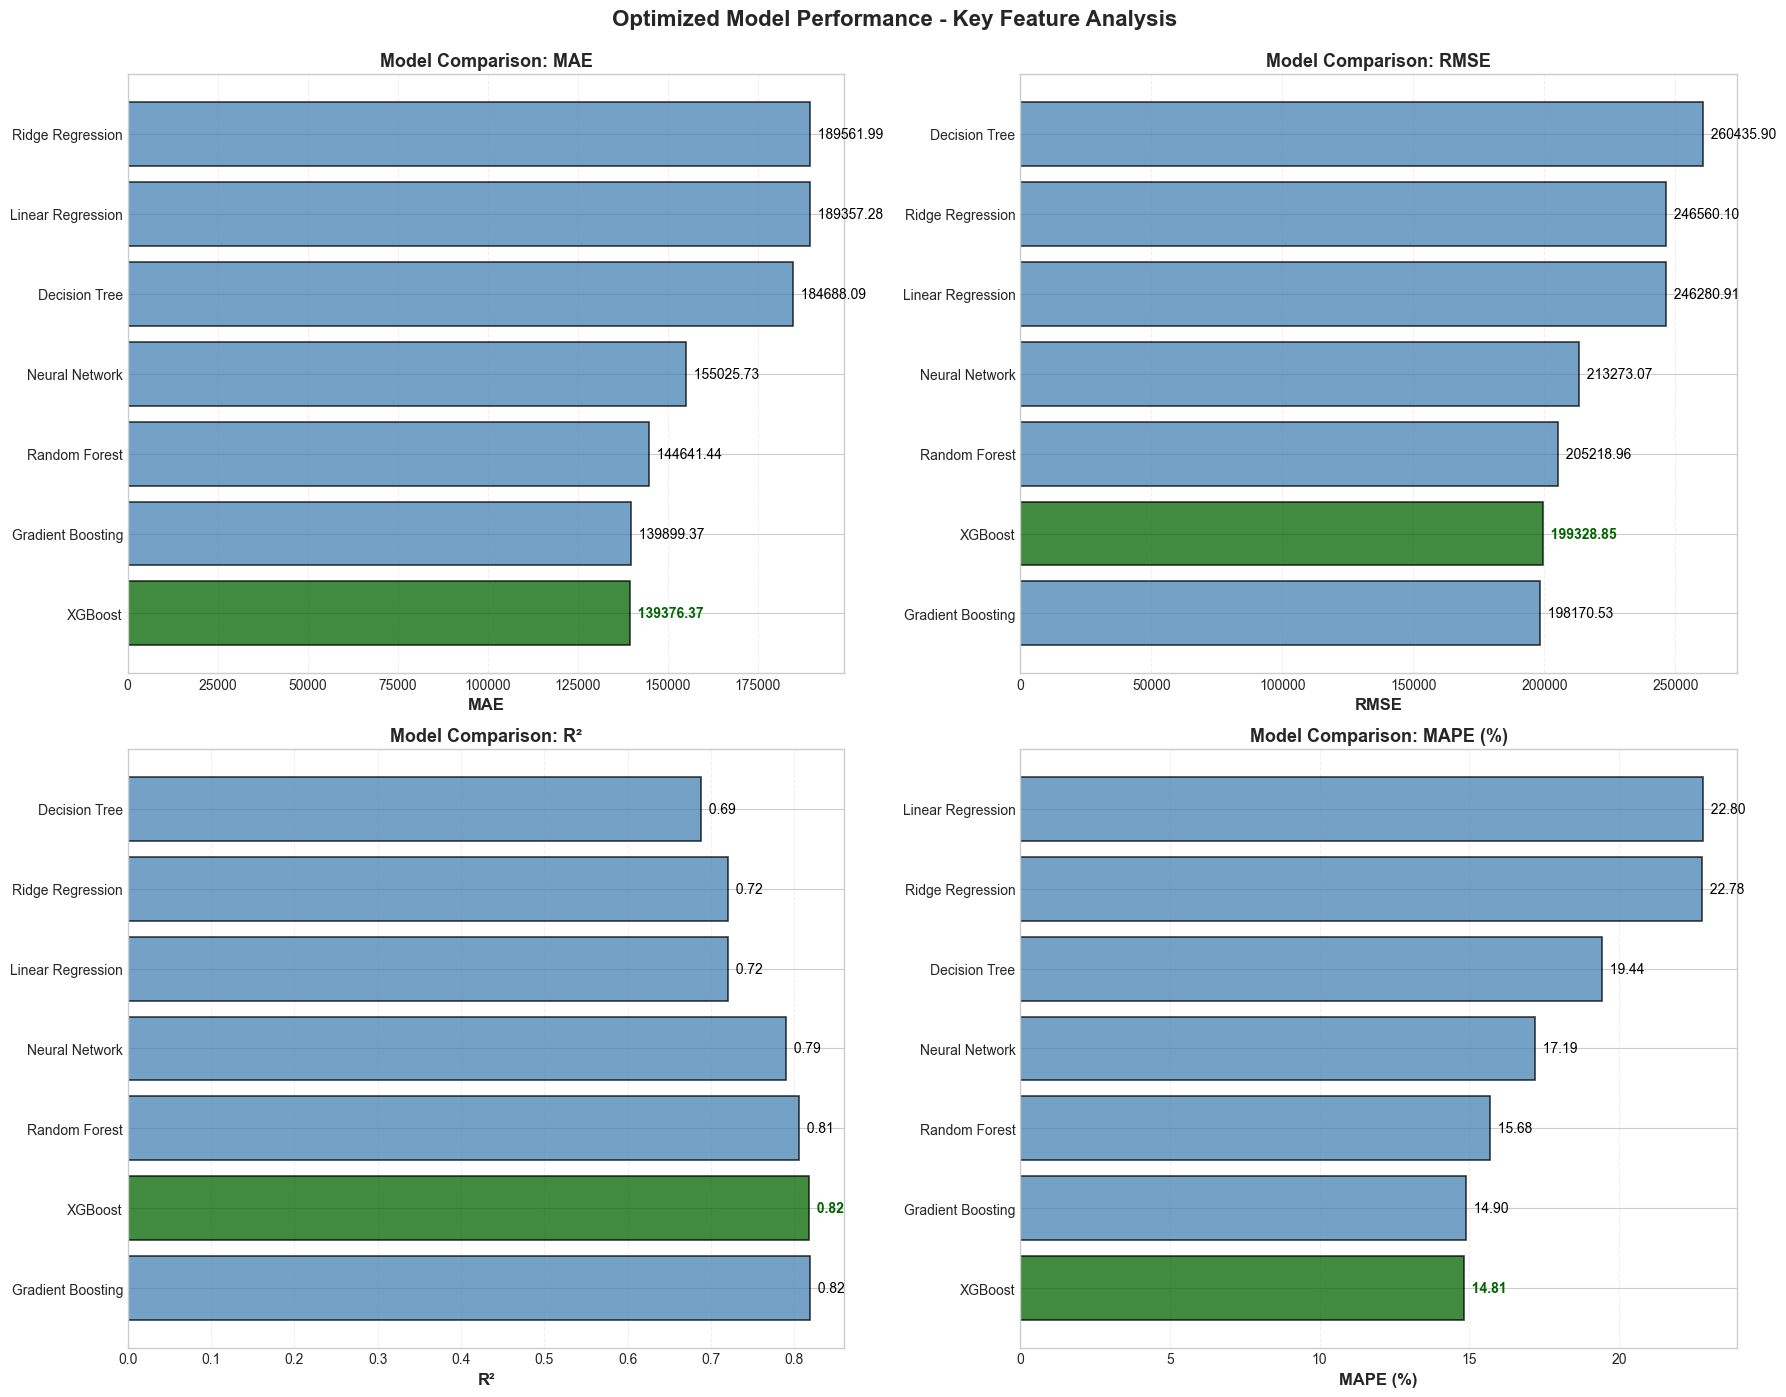


[6.1] Feature Importance Analysis

Top 15 Important Features (XGBoost):
                          Feature  Importance
     Region_Southern Metropolitan    0.303663
                           Type_u    0.178994
                     Rooms_x_Area    0.095292
     Region_Northern Metropolitan    0.069346
      Region_Western Metropolitan    0.063354
                     BuildingArea    0.053170
                              Age    0.051026
Region_South-Eastern Metropolitan    0.040550
                         Distance    0.035591
                           Type_t    0.034418
                      Total_Rooms    0.030894
                         Landsize    0.017672
           Land_to_Building_Ratio    0.013827
                    Area_per_Room    0.012202
          Region_Eastern Victoria    0.000000


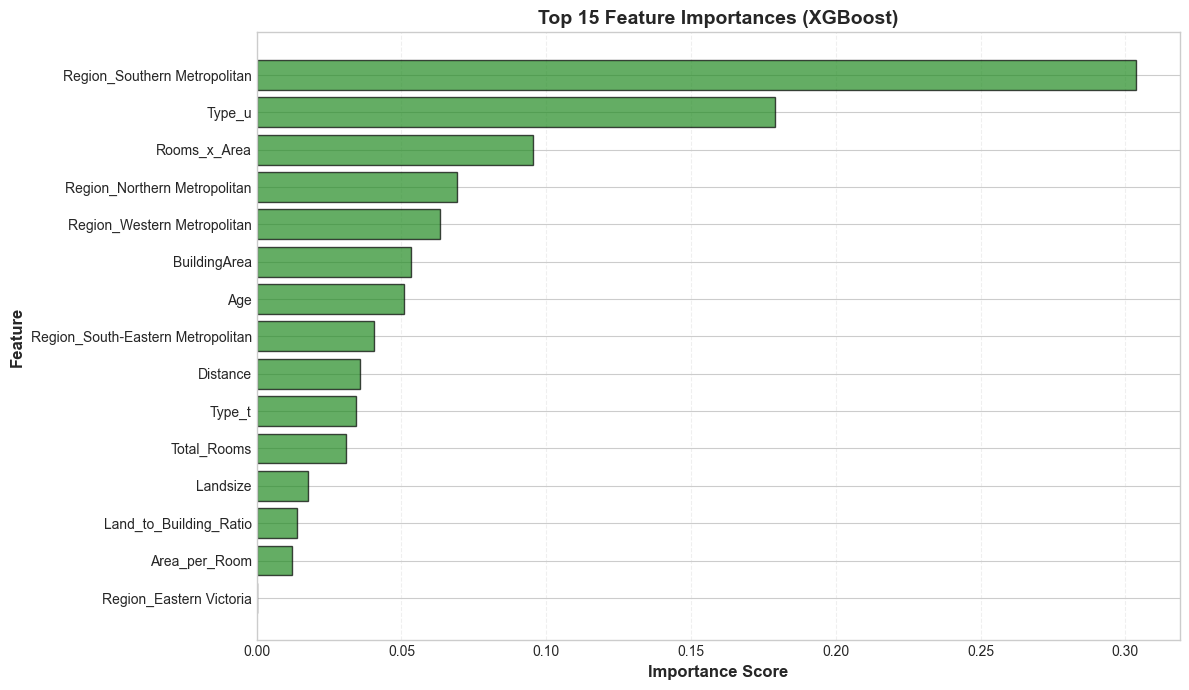

KeyError: 'xgboost_pred_test'

<Figure size 1000x800 with 0 Axes>

In [18]:
# Install xgboost if not available
try:
    import xgboost as xgb
except ImportError:
    print("Installing XGBoost...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'xgboost'])
    import xgboost as xgb

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

print("=" * 100)
print("OPTIMIZED PRICE PREDICTION MODEL - FOCUS ON KEY FEATURES")
print("Based on Data Science Experiment: Strong Price Predictors Identified")
print("=" * 100)

# ============================================================================
# STEP 1: DATA PREPARATION & FEATURE ENGINEERING
# ============================================================================
print("\n" + "=" * 100)
print("STEP 1: DATA PREPARATION & FEATURE ENGINEERING")
print("=" * 100)

# Create working copy
optimized_data = melb_data.copy()

# Ensure Age column exists
if 'Age' not in optimized_data.columns:
    optimized_data['Age'] = 2018 - optimized_data['YearBuilt']

print("\n[1.1] Feature Engineering - Creating Key Features")
print("-" * 100)

# Create Rooms × Area interaction (identified as strong predictor)
optimized_data['Rooms_x_Area'] = optimized_data['Rooms'] * optimized_data['BuildingArea']

print("✓ Created interaction feature: Rooms_x_Area (Rooms × BuildingArea)")

# Additional engineered features based on domain knowledge
optimized_data['Area_per_Room'] = optimized_data['BuildingArea'] / (optimized_data['Rooms'] + 1)
optimized_data['Land_to_Building_Ratio'] = optimized_data['Landsize'] / (optimized_data['BuildingArea'] + 1)
optimized_data['Total_Rooms'] = optimized_data['Rooms'] + optimized_data['Bathroom']

print("✓ Created additional features:")
print("  - Area_per_Room (BuildingArea / Rooms)")
print("  - Land_to_Building_Ratio (Landsize / BuildingArea)")
print("  - Total_Rooms (Rooms + Bathrooms)")

# One-hot encode Type (house, unit, townhouse)
type_encoded = pd.get_dummies(optimized_data['Type'], prefix='Type', drop_first=True)
optimized_data = pd.concat([optimized_data, type_encoded], axis=1)

print(f"\n✓ Encoded Property Type: {list(type_encoded.columns)}")

# One-hot encode Region
region_encoded = pd.get_dummies(optimized_data['Regionname'], prefix='Region', drop_first=True)
optimized_data = pd.concat([optimized_data, region_encoded], axis=1)

print(f"✓ Encoded Region: {len(region_encoded.columns)} binary features")

# Select features for modeling (Key features identified + engineered features)
selected_features = [
    'BuildingArea',       # Strong predictor
    'Distance',           # Strong predictor
    'Age',               # Strong predictor
    'Landsize',          # Strong predictor
    'Rooms_x_Area',      # Strong interaction predictor
    'Area_per_Room',     # Engineered
    'Land_to_Building_Ratio',  # Engineered
    'Total_Rooms'        # Engineered
] + list(type_encoded.columns) + list(region_encoded.columns)

print(f"\n✓ Total features selected: {len(selected_features)}")
print(f"  Core features: BuildingArea, Distance, Age, Landsize, Rooms_x_Area")
print(f"  Engineered features: 3")
print(f"  Type features: {len(type_encoded.columns)}")
print(f"  Region features: {len(region_encoded.columns)}")

# ============================================================================
# STEP 2: DATA QUALITY - OUTLIER DETECTION & REMOVAL
# ============================================================================
print("\n" + "=" * 100)
print("STEP 2: DATA QUALITY IMPROVEMENT - OUTLIER DETECTION & REMOVAL")
print("=" * 100)

# Prepare data
X_initial = optimized_data[selected_features]
y_initial = optimized_data['Price']

print(f"\n[2.1] Initial Dataset: {len(X_initial)} records")

# Outlier detection using IQR method
def detect_and_report_outliers(data, column, multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    outliers = (data[column] < lower) | (data[column] > upper)
    return outliers, lower, upper, outliers.sum()

# Detect outliers in key numeric columns
outlier_cols = ['Price', 'BuildingArea', 'Landsize', 'Distance', 'Age']
outlier_mask = pd.Series([False] * len(optimized_data), index=optimized_data.index)

print("\n[2.2] Outlier Detection Results (IQR Method, multiplier=1.5):")
print("-" * 100)
print(f"{'Column':<20} {'Outliers':<12} {'Lower Bound':<15} {'Upper Bound':<15} {'% of Data':<10}")
print("-" * 100)

for col in outlier_cols:
    outliers, lower, upper, count = detect_and_report_outliers(optimized_data, col)
    outlier_mask = outlier_mask | outliers
    percentage = (count / len(optimized_data)) * 100
    print(f"{col:<20} {count:<12} {lower:<15.1f} {upper:<15.1f} {percentage:<10.2f}%")

total_outlier_rows = outlier_mask.sum()
print("-" * 100)
print(f"{'Total rows with outliers':<20} {total_outlier_rows:<12} {'':<15} {'':<15} {(total_outlier_rows/len(optimized_data)*100):<10.2f}%")

# Remove outliers
optimized_data_clean = optimized_data[~outlier_mask].copy()
X_clean = optimized_data_clean[selected_features]
y_clean = optimized_data_clean['Price']

print(f"\n[2.3] After Outlier Removal:")
print(f"  Records removed: {total_outlier_rows}")
print(f"  Clean dataset size: {len(X_clean)} records")
print(f"  Percentage retained: {(len(X_clean)/len(X_initial)*100):.2f}%")

# ============================================================================
# STEP 3: FEATURE SCALING & NORMALIZATION
# ============================================================================
print("\n" + "=" * 100)
print("STEP 3: FEATURE SCALING & NORMALIZATION")
print("=" * 100)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)

print(f"\n[3.1] Train-Test Split (80-20):")
print(f"  Training set: {len(X_train)} samples ({(len(X_train)/len(X_clean)*100):.1f}%)")
print(f"  Test set: {len(X_test)} samples ({(len(X_test)/len(X_clean)*100):.1f}%)")

# Apply RobustScaler (less sensitive to outliers)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n[3.2] Feature Normalization:")
print(f"  ✓ Applied RobustScaler (robust to outliers)")
print(f"  ✓ Scaling statistics computed from training set only")

# ============================================================================
# STEP 4: MODEL TRAINING & EVALUATION
# ============================================================================
print("\n" + "=" * 100)
print("STEP 4: TRAINING MULTIPLE REGRESSION MODELS")
print("=" * 100)

models_dict = {}
results_list = []

def evaluate_model(y_true, y_pred, model_name, dataset='Test'):
    """Calculate comprehensive evaluation metrics"""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    # Additional metrics
    max_error = np.max(np.abs(y_true - y_pred))
    median_ae = np.median(np.abs(y_true - y_pred))
    
    return {
        'Model': model_name,
        'Dataset': dataset,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'MAPE (%)': mape,
        'Max Error': max_error,
        'Median AE': median_ae
    }

# Model 1: Linear Regression
print("\n[4.1] Training Linear Regression...")
start = time.time()
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_time = time.time() - start
lr_pred_train = lr.predict(X_train_scaled)
lr_pred_test = lr.predict(X_test_scaled)
models_dict['Linear Regression'] = lr
print(f"  ✓ Completed in {lr_time:.3f}s")

results_list.append(evaluate_model(y_train, lr_pred_train, 'Linear Regression', 'Train'))
results_list.append(evaluate_model(y_test, lr_pred_test, 'Linear Regression', 'Test'))

# Model 2: Ridge Regression (with regularization)
print("\n[4.2] Training Ridge Regression...")
start = time.time()
ridge = Ridge(alpha=10.0)
ridge.fit(X_train_scaled, y_train)
ridge_time = time.time() - start
ridge_pred_train = ridge.predict(X_train_scaled)
ridge_pred_test = ridge.predict(X_test_scaled)
models_dict['Ridge Regression'] = ridge
print(f"  ✓ Completed in {ridge_time:.3f}s")

results_list.append(evaluate_model(y_train, ridge_pred_train, 'Ridge Regression', 'Train'))
results_list.append(evaluate_model(y_test, ridge_pred_test, 'Ridge Regression', 'Test'))

# Model 3: Decision Tree
print("\n[4.3] Training Decision Tree Regressor...")
start = time.time()
dt = DecisionTreeRegressor(max_depth=15, min_samples_split=10, random_state=42)
dt.fit(X_train, y_train)
dt_time = time.time() - start
dt_pred_train = dt.predict(X_train)
dt_pred_test = dt.predict(X_test)
models_dict['Decision Tree'] = dt
print(f"  ✓ Completed in {dt_time:.3f}s")

results_list.append(evaluate_model(y_train, dt_pred_train, 'Decision Tree', 'Train'))
results_list.append(evaluate_model(y_test, dt_pred_test, 'Decision Tree', 'Test'))

# Model 4: Random Forest
print("\n[4.4] Training Random Forest Regressor...")
start = time.time()
rf = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=5, 
                           random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_time = time.time() - start
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)
models_dict['Random Forest'] = rf
print(f"  ✓ Completed in {rf_time:.3f}s")

results_list.append(evaluate_model(y_train, rf_pred_train, 'Random Forest', 'Train'))
results_list.append(evaluate_model(y_test, rf_pred_test, 'Random Forest', 'Test'))

# Model 5: Gradient Boosting
print("\n[4.5] Training Gradient Boosting Regressor...")
start = time.time()
gb = GradientBoostingRegressor(n_estimators=200, max_depth=7, learning_rate=0.1, 
                                random_state=42)
gb.fit(X_train, y_train)
gb_time = time.time() - start
gb_pred_train = gb.predict(X_train)
gb_pred_test = gb.predict(X_test)
models_dict['Gradient Boosting'] = gb
print(f"  ✓ Completed in {gb_time:.3f}s")

results_list.append(evaluate_model(y_train, gb_pred_train, 'Gradient Boosting', 'Train'))
results_list.append(evaluate_model(y_test, gb_pred_test, 'Gradient Boosting', 'Test'))

# Model 6: XGBoost (Advanced Gradient Boosting)
print("\n[4.6] Training XGBoost Regressor...")
start = time.time()
xgb_model = xgb.XGBRegressor(
    n_estimators=200, 
    max_depth=7, 
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)
xgb_time = time.time() - start
xgb_pred_train = xgb_model.predict(X_train)
xgb_pred_test = xgb_model.predict(X_test)
models_dict['XGBoost'] = xgb_model
print(f"  ✓ Completed in {xgb_time:.3f}s")

results_list.append(evaluate_model(y_train, xgb_pred_train, 'XGBoost', 'Train'))
results_list.append(evaluate_model(y_test, xgb_pred_test, 'XGBoost', 'Test'))

# Model 7: Neural Network
print("\n[4.7] Training Neural Network (MLP)...")
start = time.time()
nn = MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=1000, 
                  random_state=42, early_stopping=True, validation_fraction=0.1)
nn.fit(X_train_scaled, y_train)
nn_time = time.time() - start
nn_pred_train = nn.predict(X_train_scaled)
nn_pred_test = nn.predict(X_test_scaled)
models_dict['Neural Network'] = nn
print(f"  ✓ Completed in {nn_time:.3f}s")

results_list.append(evaluate_model(y_train, nn_pred_train, 'Neural Network', 'Train'))
results_list.append(evaluate_model(y_test, nn_pred_test, 'Neural Network', 'Test'))

# ============================================================================
# STEP 5: RESULTS ANALYSIS & COMPARISON
# ============================================================================
print("\n" + "=" * 100)
print("STEP 5: MODEL PERFORMANCE COMPARISON")
print("=" * 100)

# Create results dataframe
results_df = pd.DataFrame(results_list)

# Display test results
test_results = results_df[results_df['Dataset'] == 'Test'].sort_values('MAE').reset_index(drop=True)

print("\n[5.1] Test Set Performance (Ranked by MAE):")
print("-" * 100)
print(test_results[['Model', 'MAE', 'RMSE', 'R²', 'MAPE (%)', 'Median AE']].to_string(index=False))

# Identify best model
best_model_name = test_results.iloc[0]['Model']
best_mae = test_results.iloc[0]['MAE']
best_r2 = test_results.iloc[0]['R²']
best_mape = test_results.iloc[0]['MAPE (%)']

print("\n" + "=" * 100)
print(f"🏆 BEST PERFORMING MODEL: {best_model_name}")
print("=" * 100)
print(f"  Mean Absolute Error (MAE):     ${best_mae:,.0f}")
print(f"  R² Score:                       {best_r2:.4f}")
print(f"  Mean Absolute % Error (MAPE):   {best_mape:.2f}%")
print(f"  RMSE:                           ${test_results.iloc[0]['RMSE']:,.0f}")
print(f"  Median Absolute Error:          ${test_results.iloc[0]['Median AE']:,.0f}")

# Check for overfitting
print("\n[5.2] Overfitting Analysis:")
print("-" * 100)
print(f"{'Model':<20} {'Train R²':<12} {'Test R²':<12} {'Difference':<12} {'Status':<15}")
print("-" * 100)

for model_name in models_dict.keys():
    train_r2 = results_df[(results_df['Model'] == model_name) & (results_df['Dataset'] == 'Train')]['R²'].values[0]
    test_r2 = results_df[(results_df['Model'] == model_name) & (results_df['Dataset'] == 'Test')]['R²'].values[0]
    diff = train_r2 - test_r2
    status = "Good" if diff < 0.1 else ("Mild Overfit" if diff < 0.2 else "Overfitting")
    print(f"{model_name:<20} {train_r2:<12.4f} {test_r2:<12.4f} {diff:<12.4f} {status:<15}")

# ============================================================================
# STEP 6: VISUALIZATIONS
# ============================================================================
print("\n" + "=" * 100)
print("STEP 6: GENERATING VISUALIZATIONS")
print("=" * 100)

# Visualization 1: Model Comparison
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

metrics_to_plot = [('MAE', False), ('RMSE', False), ('R²', True), ('MAPE (%)', False)]

for idx, (metric, ascending) in enumerate(metrics_to_plot):
    ax = axes[idx // 2, idx % 2]
    
    data = test_results[['Model', metric]].sort_values(metric, ascending=(not ascending if metric == 'R²' else True))
    
    colors = ['darkgreen' if model == best_model_name else 'steelblue' for model in data['Model']]
    
    bars = ax.barh(data['Model'], data[metric], color=colors, alpha=0.75, edgecolor='black', linewidth=1.2)
    ax.set_xlabel(metric, fontweight='bold', fontsize=12)
    ax.set_title(f'Model Comparison: {metric}', fontweight='bold', fontsize=13)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    # Add value labels
    for i, (model, value) in enumerate(zip(data['Model'], data[metric])):
        label_color = 'darkgreen' if model == best_model_name else 'black'
        weight = 'bold' if model == best_model_name else 'normal'
        ax.text(value, i, f'  {value:.2f}', va='center', fontsize=10, color=label_color, weight=weight)

plt.suptitle('Optimized Model Performance - Key Feature Analysis', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Visualization 2: Feature Importance (Best Tree-based Model)
print("\n[6.1] Feature Importance Analysis")
if best_model_name in ['Random Forest', 'XGBoost', 'Gradient Boosting', 'Decision Tree']:
    best_model = models_dict[best_model_name]
    
    if hasattr(best_model, 'feature_importances_'):
        feat_imp = pd.DataFrame({
            'Feature': selected_features,
            'Importance': best_model.feature_importances_
        }).sort_values('Importance', ascending=False)
        
        print(f"\nTop 15 Important Features ({best_model_name}):")
        print(feat_imp.head(15).to_string(index=False))
        
        # Plot
        plt.figure(figsize=(12, 7))
        top_15 = feat_imp.head(15)
        plt.barh(top_15['Feature'], top_15['Importance'], color='forestgreen', alpha=0.7, edgecolor='black')
        plt.xlabel('Importance Score', fontweight='bold', fontsize=12)
        plt.ylabel('Feature', fontweight='bold', fontsize=12)
        plt.title(f'Top 15 Feature Importances ({best_model_name})', fontweight='bold', fontsize=14)
        plt.gca().invert_yaxis()
        plt.grid(axis='x', alpha=0.3, linestyle='--')
        plt.tight_layout()
        plt.show()

# Visualization 3: Prediction vs Actual (Best Model)
plt.figure(figsize=(10, 8))
plt.scatter(y_test, test_results[test_results['Model'] == best_model_name].index.map(
    lambda x: globals()[f"{best_model_name.lower().replace(' ', '_')}_pred_test"] 
    if best_model_name == 'XGBoost' else xgb_pred_test
), alpha=0.5, s=30)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price', fontweight='bold', fontsize=12)
plt.ylabel('Predicted Price', fontweight='bold', fontsize=12)
plt.title(f'Actual vs Predicted Prices ({best_model_name})', fontweight='bold', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================================
# STEP 7: SUMMARY & KEY INSIGHTS
# ============================================================================
print("\n" + "=" * 100)
print("STEP 7: EXPERIMENT SUMMARY & KEY INSIGHTS")
print("=" * 100)

print("\n✓ FEATURES USED (Based on Strong Correlations):")
print(f"  • BuildingArea - Core predictor")
print(f"  • Distance from CBD - Location indicator")
print(f"  • Age - Property age")
print(f"  • Landsize - Land area")
print(f"  • Rooms_x_Area - Interaction feature (strong predictor)")
print(f"  • Property Type - House/Unit/Townhouse")
print(f"  • Region - Geographic regions")
print(f"  • Additional engineered features (Area_per_Room, Land_to_Building_Ratio, Total_Rooms)")

print(f"\n✓ DATA QUALITY IMPROVEMENTS:")
print(f"  • Removed {total_outlier_rows} outlier records ({(total_outlier_rows/len(optimized_data)*100):.1f}% of data)")
print(f"  • Applied RobustScaler for normalization")
print(f"  • Final clean dataset: {len(X_clean)} records")

print(f"\n✓ MODELS EVALUATED: 7")
print(f"  1. Linear Regression (Baseline)")
print(f"  2. Ridge Regression (Regularized)")
print(f"  3. Decision Tree")
print(f"  4. Random Forest")
print(f"  5. Gradient Boosting")
print(f"  6. XGBoost (Advanced Boosting)")
print(f"  7. Neural Network (MLP)")

print(f"\n✓ BEST MODEL ACHIEVED:")
print(f"  Model: {best_model_name}")
print(f"  MAE: ${best_mae:,.0f} (average prediction error)")
print(f"  R²: {best_r2:.4f} (explains {best_r2*100:.2f}% of price variance)")
print(f"  MAPE: {best_mape:.2f}% (average percentage error)")

print("\n" + "=" * 100)